In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.drop_duplicates()
df.shape

(100000, 9)

In [5]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
df = df.drop_duplicates()

In [7]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [8]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df = df[df['gender'] != 'Other']

In [10]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


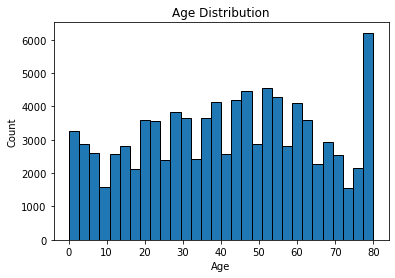

In [11]:
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

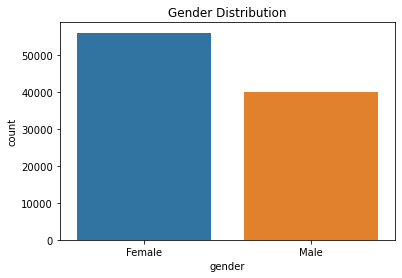

In [12]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

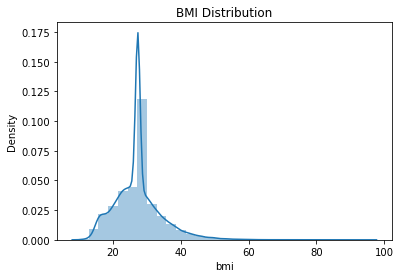

In [13]:
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

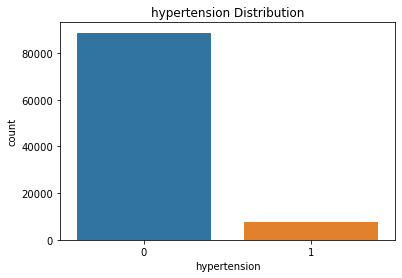

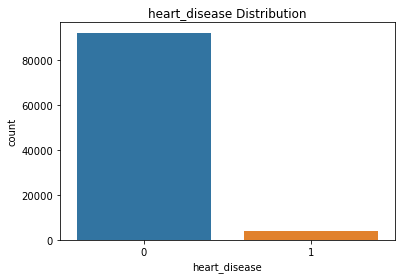

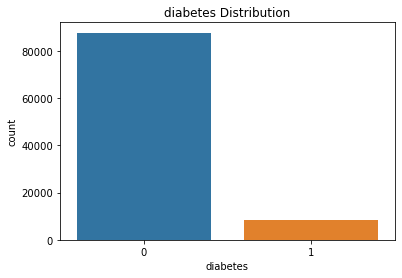

In [14]:
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

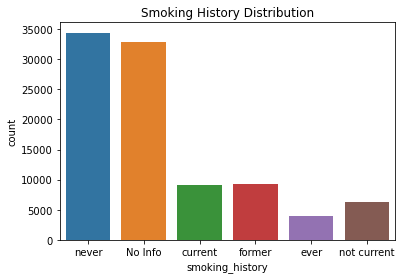

In [15]:
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

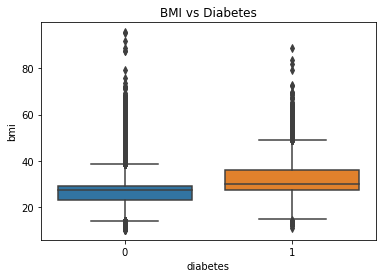

In [16]:
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

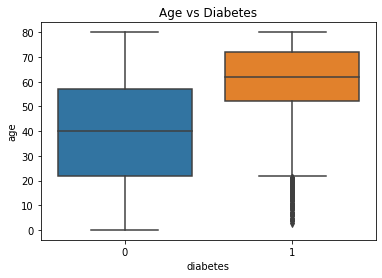

In [17]:
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

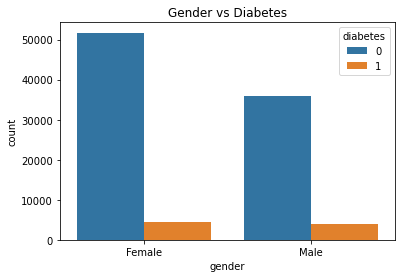

In [18]:
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

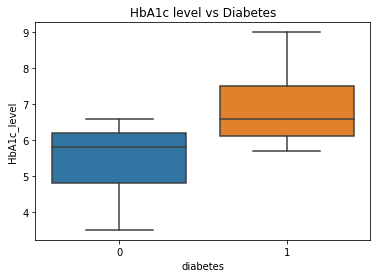

In [19]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

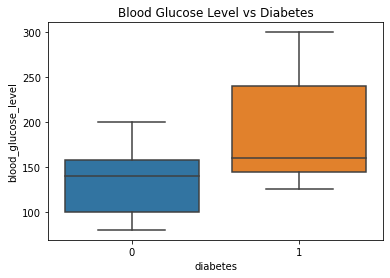

In [20]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

In [21]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

non-smoker     67276
past_smoker    19655
current         9197
Name: smoking_history, dtype: int64


In [22]:
data = df.copy()

In [23]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

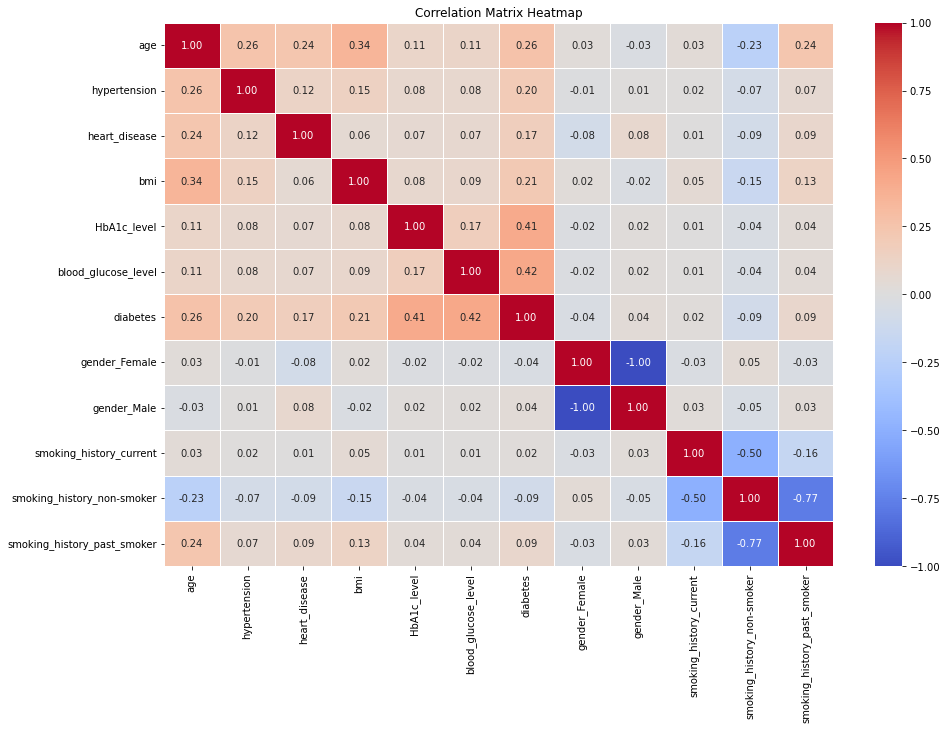

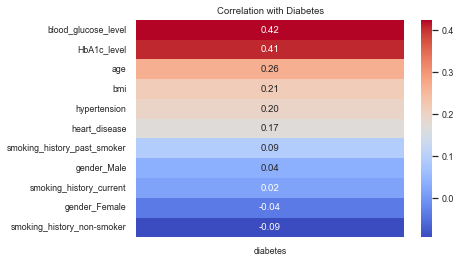

In [24]:
# Compute the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

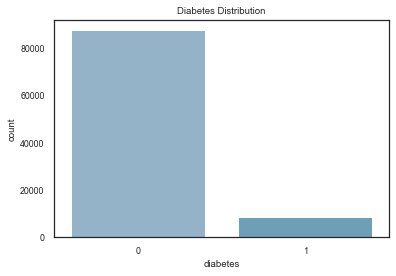

In [25]:
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le= LabelEncoder()

df['gender']=le.fit_transform(df['gender'])
df['smoking_history']=le.fit_transform(df['smoking_history'])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [29]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [30]:
X = df[['gender', 'age', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [32]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
print('Decision Tree Regressor', (r2_score(y_test, predictions)))

Decision Tree Regressor 0.361444749808167


In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print('Linear Regressor', (r2_score(y_test, predictions)))

Linear Regressor 0.3386483451245834


In [34]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print('Random Forest Regressor', r2_score(y_test, predictions))

Random Forest Regressor 0.6499412226099687


In [35]:
knr = KNeighborsRegressor(n_neighbors = 2)
knr.fit(X_train, y_train)
predictions = knr.predict(X_test)
print('K Nearest Regressor', r2_score(y_test, predictions))

K Nearest Regressor 0.40400217963484186


In [36]:
svm = SVR()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print('Support vector Regressor', r2_score(y_test, predictions))

Support vector Regressor 0.4485028765224216


In [37]:
abc = AdaBoostRegressor()
abc.fit(X_train, y_train)
predictions = abc.predict(X_test)
print('Ada Boost Regressor', r2_score(y_test, predictions))

Ada Boost Regressor 0.6493632912088856


In [38]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)
print('Ada Boost Regressor', r2_score(y_test, predictions))

Ada Boost Regressor 0.6893227815934773


In [39]:
lso = Lasso()
lso.fit(X_train, y_train)
predictions = lso.predict(X_test)
print('lasso Regressor', r2_score(y_test, predictions))

lasso Regressor 0.19870526885707906


In [40]:
rdg = Ridge()
rdg.fit(X_train, y_train)
predictions = rdg.predict(X_test)
print('Ridge Regressor', r2_score(y_test, predictions))

Ridge Regressor 0.3386483521702214


In [41]:
br = BayesianRidge()
br.fit(X_train, y_train)
predictions = br.predict(X_test)
print('Bayes Ridge Regressor', r2_score(y_test, predictions))

Bayes Ridge Regressor 0.33864861124349077


In [42]:
elsn = ElasticNet()
elsn.fit(X_train, y_train)
predictions = elsn.predict(X_test)
print('Elastic Net Regressor',r2_score(y_test, predictions))

Elastic Net Regressor 0.21941528342445926


In [43]:
hr = HuberRegressor()
hr.fit(X_train, y_train)
predictions = hr.predict(X_test)
print('Huber Regressor', r2_score(y_test, predictions))

Huber Regressor -0.09559071402764552


<AxesSubplot:>

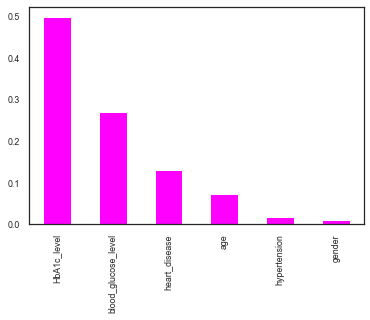

In [48]:
index=df.columns[[0,1,2,3,6,7]]
importance=pd.Series(dt.feature_importances_,index=index)
importance.nlargest(7).plot(kind="bar",colormap="spring")